# Create 4-col tsv readable text from 4-col tsv full content file
* The input should be a tsv table with url, end_url, binary, full-content
* The output will then be a file with url, end_url, length-readable-text, readable-text

In [90]:
%%bash
# Take a list of urls and generate the full content file list
# if you see this message: dyld: Library not loaded: /usr/local/opt/readline/lib/libreadline.6.dylib
# you need to upgrade bash via `brew upgrade bash`, then restart the kernel

## Run the output list from previous cell through the url-classifier in text saving mode.
#. ../set_flag/return_full_text_on               # This sets an env variable which tells urlChecker to save content to disk
export URL_FULL_CONTENT=True

cat temp/random_1000_plain_urls.txt | \
 python ../bin/urlChecker.py > \
 temp/random_1000_plain_urls.tsv
echo "DONE!"
### When the script finishes, you should have an html file in the `URL_SAVE_DEST` location named after the url, i.e. acme.com will have an acme.com file with the html content in it.

DONE!


----------
hawkaerial.com
bgreen.solar
texasserenityacademy.net
phonewerk.de
peachdish.com
offtime.co
bigfishpr.com
mayvenn.com
mcknight.org
rickjoneselectric.com
deers.com.pl
easytrainingchoice.com
akitechnologies.com
acfellowship.org
atmosphair.fr
frankly.me
vimax.br.com
marvin.at
nnrhospital.com
seaislandmedia.com
4mypromo.com
aquariumbyamblard.com
visionbd.com
mesautomation.com.mx
jfkhealthsystem.org
geneadviser.com
launchlabcapital.com
xenlogixsoftware.in
nolimitsav.net
jwvpork.com
egisinternational.com
pixelproject.net
cetac.se
matplotlib.org
austinrees.com
medinacreativehousing.com
attractivesmiles.com
startuplab.fr
raywhitereservoir.com.au
barleyz.com
fitwasted.com
ikorn.be
motobudrex.pl
ascendispharma.com
riflesdirect.com
ontimeinternational.com
dbnx.com
intercollege.nl
nuteca.com
evansshoes.com.au
vertices.com
digitalia.fr
zindel.de
incisanfire.com
binghisboutique.com
konti.ua
unifieddigital.com
spine.org
luckyaproperties.com
octopusink.ca
bahco.com
dap.com
sonicautomotive.co

In [3]:
# REMOVE FOREIGN LANGUAGE
# input a file with full html for a bunch of urls
# output a file with full html for that bunch - any urls found to have a foreign language.
import pandas as pd
import classification.classify as cf
filterNAME = "it_consult"
base_name = "category_content_{}".format(filterNAME)
source_file = 'temp/categories/{}.tsv'.format(base_name)
target_file = "temp/categories/{}_lang_filtered.tsv".format(base_name)
table = [] 

def probably_not_foreign(arr_data):
    threshold = 3
    print arr_data 
    for lang in range(18,29,1):
        print arr_data[lang]
        if int(arr_data[lang]) < threshold:
            continue
        else:
            return True
    return False
    
def probably_english(arr_data, threshold=20):
    if int(arr_data[14]) < threshold:
        return False
    else:
        return True
    
with open(source_file, 'r') as source, open(target_file, 'w') as target:
    for line in source:
        line = line.decode('ascii', 'ignore').encode('ascii')
        cf.process_line(line)
        try:
            arr_results = cf.process_line(line)
        except:
            print "ERROR on ", line[:50]
            continue
        if len(arr_results) != 0:
            #print arr_results
            if probably_not_foreign(arr_results):
                target.write(line)
                table.append(arr_results)


print len(table)
df = pd.DataFrame(table)
threshold = 2
df.head()
print "DONE"


NameError: global name 'clf_staffing' is not defined

In [5]:
# Take a file with html content per line and output a file with visible words replacing the full html
# source_file: string, path to 4 column tsv, (url, end_url, binary, full_text)
# returns: list<dict(url,end_url,binary,description)>
import classification.data_extraction_functions as de
import os
import pandas as pd
print os.getcwd()
filterNAME="it_consult"
base_name = "category_content_{}_lang_filtered".format(filterNAME)
source_file = 'temp/categories/{}.tsv'.format(base_name)
target_file = 'temp/categories/{}_visible.tsv'.format(base_name)

def open_filter_file(source_file, target_name):
    ret_list = []
    with open(source_file, 'r') as source, open(target_name, 'w') as target:
        for line in source:
            url, end_url, binary, full_text = line.split('\t')
            visible_text = de.get_visible_text(full_text.replace('evaluate_content_for_200s: ', '').strip())
            len_visible = len(visible_text.split(' '))
            target.write('\t'.join(
            [
                url,
                end_url,
                str(len_visible),
                str(visible_text.encode('ascii', 'ignore').decode('ascii'))
            ]))
            target.write('\n')

import csv
import sys
csv.field_size_limit(sys.maxsize)
def open_csv_file(source_file, target_name):
    ret_list = []
    with open(source_file, 'r') as source, open(target_name, 'w') as target:
        sourcereader = csv.reader(source)
        for row in sourcereader:
            try:
                url, end_url, binary, full_text = row[0], row[1], row[2], row[3]
                #print url
                visible_text = de.get_visible_text(full_text.replace('evaluate_content_for_200s: ', '').strip())
                len_visible = len(visible_text.split(' '))
                target.write('\t'.join(
                [
                    url,
                    end_url,
                    str(len_visible),
                    str(visible_text.encode('ascii', 'ignore').decode('ascii'))
                ]))
                target.write('\n')
            except:
                continue
            

csv_format = False
if csv_format:
    res_list = open_csv_file(source_file, target_file)
else:
    res_list = open_filter_file(source_file, target_file)
print "DONE saved to ", target_file
                

/Users/efrainolivares/repos/url_classifier_develop/notebooks
DONE saved to  temp/categories/category_content_it_consult_lang_filtered_visible.tsv


# Take two visible text files and create map of xy word cross counts
* Open both files and gather all words in two separate lists.
* Create a dictionary of tuples containing counts for each word ex: "word":(x times in file 1, y times in file 2)

In [6]:
! ls data/
import pandas as pd
view = pd.read_csv('data/171009_staffing_visible.tsv', delimiter='\t')
view.head()

00_source_urls
01_clean_url_lists
02_training_sheets
03_final_training_sheets
04_models
170915_manual_ieinosup_noforext_content.tsv
170915_manual_ieinosup_noforext_content_evaluate.tsv
170915_manual_ieinosup_noforext_content_evaluate_lang_filtered.tsv
170915_manual_ieinosup_noforext_content_evaluate_lang_filtered_visible.tsv
170915_manual_ieinosup_training_data_1_0.tsv
170915_manual_no_suppress.csv
170915_manual_no_suppress_noforext.csv
170915_manual_no_suppress_noforext_content.tsv
170915_manual_no_suppress_noforext_content_evaluate.tsv
170915_manual_no_suppress_noforext_content_evaluate_lang_filtered.tsv
170915_manual_no_suppress_noforext_content_evaluate_lang_filtered_visible.tsv
170915_manual_staffing.csv
170915_manual_staffing_noforext.csv
170915_manual_staffing_noforext_content.tsv
170915_manual_staffing_noforext_content_evaluate.tsv
170915_manual_staffing_noforext_content_evaluate_lang_filtered.tsv
170915_manual_staffing_noforext_content_evaluate_lang_filtered_visible.tsv
170915

,gempartnersinc.com,http://www.gempartnersinc.com/,good,Gem Partners | Home,Unnamed: 4,Unnamed: 5,"Gem Partners Home info@gempartnersinc.com Home About Us Company Profile Vision Mission Our Practice Areas Life Sciences Process Contact Us Solutions that you need! Cutting edge is head hunting and selection Our specializations is for senior level recruitment and have successfully placed the candidates at the level of Senior Director, Vice President and Senior Vice President from diverse background. Know More ... Effective Search Mechanism Go beyond keyword search to matching candidate based on their skills, experiences, and career trajectories. Full Responsive Process Assists businesses in attracting, assessing and hiring the people who meet these needs. Fast On Time Streamlining our business processes makes our hiring more efficient and productive. We Make Your Smile With a Great Team We offer response and accountability to our clients with our goal being to build a long-lasting relationship in which clients trust our ability to seek out the best talent for them. Contact info Email: info@gempartnersinc.com Website: www.gempartnersinc.com News Feed Latest Updates Follow Us 2014 Gem Partners Inc All Rights Reserved Sitemap Privacy Policy Contact"
0,collegecornerstone.com,http://www.collegecornerstone.com/,good,College CornerStone - Site,NaN,NaN,College CornerStone Site Contact Us Login Home...
1,mediacorp.ca,http://www.mediacorp.ca/,good,Mediacorp Canada Inc. | Excellence in Employme...,"jobs, canada jobs, jobs in canada, employment,...",Mediacorp Canada Inc. manages the well-known C...,Mediacorp Canada Inc. Excellence in Employment...
2,physiciansprn.com,http://www.physiciansprn.com/,good,PhysiciansPRN,NaN,NaN,PhysiciansPRN Physicians PRN About Us Locum Te...
3,technicheglobal.com,http://www.technicheglobal.com/,good,Techniche Global - Recruitment Specialists For...,PLC SCADA DCS Instrumentation Controls Control...,Techniche Global - Recruitment Specialists For...,Techniche Global Recruitment Specialists For E...
4,whitehorsemanpower.in,http://www.whitehorsemanpower.in/,good,Welcome To White Horse Manpower,NaN,NaN,Welcome To White Horse Manpower 0 200 swing 20...


In [24]:
# input two files with visible text per line and output a dictionary with x,y coordinates for words
#source_2 = "data/170915_manual_tech_consult_noforext_content_evaluate_lang_filtered_visible.tsv"
#source_1 = "temp/ieinosup/170915_manual_webhosting_noforext_content_evaluate_lang_filtered_visible.tsv"
#source_2 = "temp/categories/all_visible_no_staffing.tsv"
#source_1 = "temp/categories/category_content_staffing_lang_filtered_visible.tsv"
source_2 = "data/171009_staffing_visible.tsv"
source_1 = "data/171009_no_suppress_visible.tsv"
import re
from collections import defaultdict


def clean_words(arr_words):
    # remove anything that has numbers
    words = [word for word in arr_words if not any(char.isdigit() for char in word) and re.search('[a-zA-Z]', word)]
    # remove anything with these characters
    bad_markers = ['=', '>', ')', '(', "'", "[", "]","."]
    final_words = []
    for word in words:
        keep = True
        for marker in bad_markers:
            if marker in word:
                keep = False
                continue
        if keep:
            final_words.append(word)
    return final_words

def file_len(fname):
    with open(fname) as f:
        for i, l in enumerate(f):
            pass
    return i + 1

# Helper function to extract all text from a single file
def get_dict_word_pairs(source_file1, source_file2):
    len_f1 = file_len(source_file1)
    len_f2 = file_len(source_file2)
    ratio = float(len_f1)/float(len_f2)
    word_dict = {}
    column_with_text = 6
    for idx, source_file in enumerate([source_file1, source_file2]):
        with open(source_file, 'r') as source:
            for line in source:
                full_text = line.split('\t')[column_with_text]
                words = clean_words(full_text.split(' '))
                for idx_word, word in enumerate(words):
                    try:
                        word_dict[word][idx] += 1
                    except:
                        word_dict[word] = [0,0]
                        word_dict[word][idx] += 1
                    if idx_word+1 < len(words):
                        try:
                            word_dict["{} {}".format(words[idx_word], words[idx_word + 1])][idx] += 1
                        except:
                            word_dict["{} {}".format(words[idx_word], words[idx_word + 1])] = [0,0]
                            word_dict["{} {}".format(words[idx_word], words[idx_word + 1])][idx] += 1
                    if idx_word+2 < len(words):
                        try:
                            word_dict["{} {} {}".format(words[idx_word], words[idx_word + 1],words[idx_word + 2])][idx] += 1
                        except:
                            word_dict["{} {} {}".format(words[idx_word], words[idx_word + 1],words[idx_word + 2])] = [0,0]
                            word_dict["{} {} {}".format(words[idx_word], words[idx_word + 1],words[idx_word + 2])][idx] += 1
    
    # Assuming you always have MORE in the ref context file, normalize the numbers (scale  y)
    for key, val in word_dict.iteritems():
        word_dict[key] = [val[0], int(ratio*val[1])]
    return word_dict


word_dict = get_dict_word_pairs(source_1, source_2)
print "DONE, FOUND THIS MANY WORDS COUNTS:", len(word_dict)

#clean_words(['=', 'a1', 'good'])            

DONE, FOUND THIS MANY WORDS COUNTS: 33043


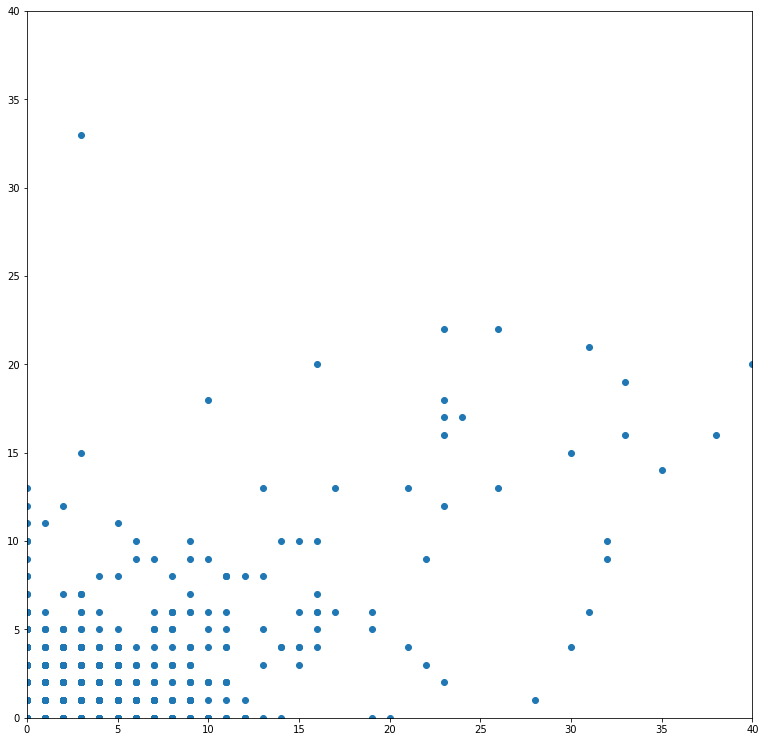

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

xarr = []
yarr = []
for word, xy_pair in word_dict.iteritems():
    xarr.append(xy_pair[0])
    yarr.append(xy_pair[1])
    

plt.figure(figsize = (13,13))
size = 40
plt.axis([0,size,0,size])
plt.scatter(xarr,yarr)
plt.show()

In [28]:
# sort through the dictionary and pull out the words closes to the axis of language we want
import math

def get_top_hits(word_dict, topn=200, xmin=5, cut_angle=40, xmax=60000, ymin=0, ymax=30):
    final_list = []
    for word, xy in word_dict.iteritems():
        if xy[0] <= xmax and xy[0] >= xmin and xy[1] <= ymax and xy[1] >= ymin:
            if float(xy[1])/float(xy[0]+1) < math.tan(math.radians(cut_angle)):
                #print word, xy[0], xy[1], "\t",float(xy[1])/float(xy[0]+1), math.tan(math.radians(cut_angle))
                final_list.append( (word, xy))
    
    final_list.sort(key=lambda x: x[1][0])
    final_list.reverse()
    return final_list[:topn]

def stringify_list(lhits):
    ret_strings = []
    for hit in lhits:
        #ret_strings.append("\"(\\W {}|{} \\W)\"".format(hit[0], hit[0]))
        ret_strings.append("\" {} \"".format(hit[0]))
    return ','.join(ret_strings)
    
        
final_list = get_top_hits(word_dict, 200)
print stringify_list(final_list)
if True:
    for item in final_list:
        print item

" you "," We "," on "," is "," our "," that "," by "," or "," are "," we "," us "," have "," about "," Our "," can "," more "," Employment "," an "," Us "," About "," HR "," all "," The "," at "," Job "," I "," from "," Home "," not "," writing "," be "," Virginia "," Training "," Blog "," as "," All "," business "," in the "," it "," Management "," of the "," Search "," this "," time "," Jobs "," get "," More "," most "," Careers "," information "," need "," what "," help "," do "," Clariness "," background "," California "," employment "," Interview "," Patient "," Read "," will "," You "," We are "," work "," ago "," jobs "," Utah "," Your "," to the "," out "," About Us "," provide "," Aviation "," being "," has "," Land Leisure "," Consultancy "," about months "," than "," American Land "," great "," Application "," Land "," about months ago "," way "," months "," up "," Contact Us "," Leisure "," Solutions "," Get "," American Land Leisure "," months ago "," American "," into ","

In [179]:
# Final cell, choose a reference language, and get list of keywords against that for the others.
languages = [
    "bank",
    "education",
    "goverment",
    "hospital",
    "hotel",
    "petcare",
    "restaurant",

]
# source of interest should be source_2, which ends up on x axis <->
ref_language = "staffing"
path_ref_language = "temp/categories/category_content_{}_lang_filtered_visible.tsv".format(ref_language)

for language in languages:
    path_language = "temp/categories/category_content_{}_lang_filtered_visible.tsv".format(language)
    word_dict = get_dict_word_pairs(path_language, path_ref_language)
    final_list = get_top_hits(word_dict, 200)
    length_list = len(final_list)
    print "    [\n        \"--{} {}--\", {},\n    ],".format(language, length_list, stringify_list(final_list))


    [
        "--bank 118--", " banking "," bank "," account "," credit "," loans "," personal "," savings "," online "," deposit "," loan "," card "," accounts "," checking "," mortgage "," online banking "," money "," insurance "," branch "," investment "," debit "," mobile banking "," atm "," rates "," cards "," credit card "," trust "," savings account "," business banking "," security "," internet "," cash "," ne "," products "," board "," internet banking "," click here "," calculators "," commercial "," hours: "," of deposit "," rate "," close "," center "," debit card "," affinbank "," certificates "," credit cards "," certificates of "," personal banking "," certificates of deposit "," enroll "," hours: monday-friday "," monday-friday "," pay "," interest "," of credit "," id "," mortgages "," visa "," al-arafah "," cash management "," deposit accounts "," banking login "," money market "," colorado "," banking business "," rewards "," trade "," mastercard "," property "," dep

    [
        "--hotel 109--", " hotel "," hotels "," book "," offers "," aston "," events "," rooms "," resort "," book now "," city "," azimut "," amora "," apex "," spa "," stay "," at the "," resorts "," special "," inn "," london "," guests "," rates "," weddings "," meetings "," room "," san "," dining "," hotels resorts "," suites "," house "," hotels in "," gallery "," hotel apex "," restaurant "," amora hotel "," adaaran "," special offers "," luxury "," glasgow "," location "," heritance "," art "," bar "," select "," check "," diego "," beach "," san diego "," night "," close "," accommodation "," arlo "," visit "," enjoy "," packages "," emaar "," apex city "," holiday "," hospitality "," nights "," emaar hotels "," holiday inn "," emaar hotels resorts "," discover "," website "," boutique "," reservations "," amara "," guest "," rate "," meetings events "," star "," city of "," guests guests "," collection "," hotels, "," best rate "," located "," villas "," apx "," plaza 

In [89]:
# ambientalbr.com.br
!. ../set_flag/return_full_text_on; echo elglobo.com.mx | python ../bin/urlChecker.py | python ../classifier/classify.py > temp_file.tsv
with open("temp_file.tsv",'r') as source:
    line_count = -2
    for line in source:
        cols = line.split('\t')
        for col in cols:
            print line_count, col
            line_count += 1

----------
elglobo.com.mx
-2 #% starting script

-1 processing input

0 elglobo.com.mx
1 http://www.elglobo.com.mx/
2 Foreign
3 25533
4 348
5 0
6 keywords marketing: []
7 0
8 keywords staffing: []
9 2
10 desc marketing: [u'a hr', u'post']
11 1
12 desc staffing: [u'seo']
13 1
14 --marketing-- [u'seo']
15 1
16 --staffing-- [u'post']
17 0
18  --medical--  []
19 0
20 --goverment-- []
21 0
22 --education-- []
23 0
24 --retail-- []
25 0
26 --food-- []
27 0
28 --emergency services-- []
29 0
30 --banking-- []
31 0
32 --manufacturing-- []
33 0
34 --telecommunications-- []
35 0
36 --hotels-restaurants-- []
37 0
38 --tourist-attractions-- []
39 0
40 --organizations-- []
41 0
42 --animal-rescue-shelter-- []
43 0
44 --military-- []
45 34
46 --spanish 200-- [u' la ', u' en ', u' el ', u' para ', u' que ', u' los ', u' con ', u' del ', u' ms ', u' por ', u' o ', u' tu ', u' lo ', u' nuestros ', u' nuestra ', u' nuestro ', u' todos ', u' aviso ', u' te ', u' ser ', u' todos los ', u' inicio ', u' dere